Exploratory SP

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse
from scipy.fft import fft, ifft


In [73]:
def fftPlot(y):
    
    # get the list of frequencies
    frequency = np.linspace(0,1,np.size(y))

    # get the list of spectrums
    spectrum=abs(fft(y))**2
    normalized_spectrum=spectrum/spectrum[0]

    # plot nspectrum per frequency, with a semilog scale on nspectrum
    plt.semilogy(frequency,normalized_spectrum,marker='o',linewidth='2',color='k')

In [ ]:
def decompPlot(df, col):
    
    y = df[col]
    
    # Multiplicative Decomposition 
    multiplicative_decomposition = seasonal_decompose(y, model='multiplicative', period=28*2)

    # Additive Decomposition
    additive_decomposition = seasonal_decompose(y, model='additive', period=28*2)

    # Plot
    plt.rcParams.update({'figure.figsize': (16,12)})
    multiplicative_decomposition.plot().suptitle('Multiplicative Decomposition', fontsize=16)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])

    additive_decomposition.plot().suptitle('Additive Decomposition', fontsize=16)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])

    plt.show()

In [18]:
def newNameColumn(column_name):
    return column_name.lower().split()[0]

In [27]:
def renameColumns(df_columns):
    new_names = [newNameColumn(col) for col in df_columns]
    return {key: value for key, value in zip(df_columns, updated_cols)}
    

In [2]:
# read the sheet containing workout information excluding the comments, name of routine, and duration
df = pd.read_csv("sleeps.csv")




In [43]:
# check for NA values
print(df.info())

# check the formatting for Sleep onset and Wake onset
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Cycle start time            114 non-null    object 
 1   Cycle end time              113 non-null    object 
 2   Cycle timezone              114 non-null    object 
 3   Sleep onset                 114 non-null    object 
 4   Wake onset                  114 non-null    object 
 5   Sleep performance %         114 non-null    int64  
 6   Respiratory rate (rpm)      114 non-null    float64
 7   Asleep duration (min)       114 non-null    int64  
 8   In bed duration (min)       114 non-null    int64  
 9   Light sleep duration (min)  114 non-null    int64  
 10  Deep (SWS) duration (min)   114 non-null    int64  
 11  REM duration (min)          114 non-null    int64  
 12  Awake duration (min)        114 non-null    int64  
 13  Sleep need (min)            114 non

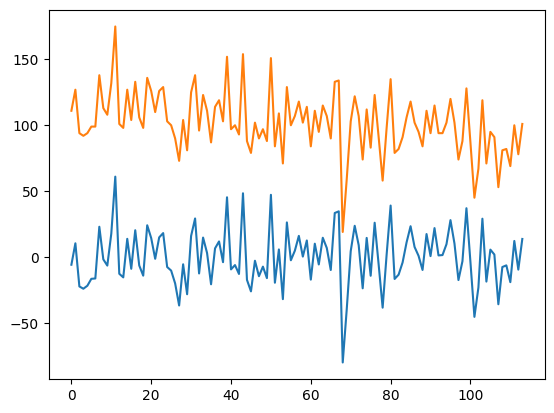

In [5]:
detrended = signal.detrend(df['Deep (SWS) duration (min)'].values)
plt.plot(detrended)
plt.plot(df['Deep (SWS) duration (min)'].values)

In [30]:
df.describe()

,Sleep performance %,Respiratory rate (rpm),Asleep duration (min),In bed duration (min),Light sleep duration (min),Deep (SWS) duration (min),REM duration (min),Awake duration (min),Sleep need (min),Sleep debt (min),Sleep efficiency %
count,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000
mean,98.210526,13.491228,502.807018,546.350877,261.552632,102.096491,139.157895,43.543860,468.526316,3.368421,92.035088
std,8.972400,0.339328,58.123286,60.765177,42.533296,23.250072,32.625680,17.148565,13.232576,15.213678,2.986488
min,20.000000,12.700000,115.000000,116.000000,73.000000,19.000000,23.000000,1.000000,451.000000,0.000000,80.000000
25%,100.000000,13.200000,480.000000,525.000000,236.500000,90.000000,116.250000,34.000000,460.000000,0.000000,91.000000
50%,100.000000,13.500000,510.500000,550.500000,267.500000,101.000000,134.500000,41.000000,466.000000,0.000000,92.500000
75%,100.000000,13.700000,535.500000,575.000000,288.000000,115.000000,163.000000,51.000000,473.750000,0.000000,94.000000
max,100.000000,14.300000,583.000000,653.000000,357.000000,175.000000,220.000000,109.000000,566.000000,110.000000,98.000000


In [5]:
# rename columns to make them script-friendly
df_renamed = df.rename(columns=renameColumns(df.columns[9:12]))


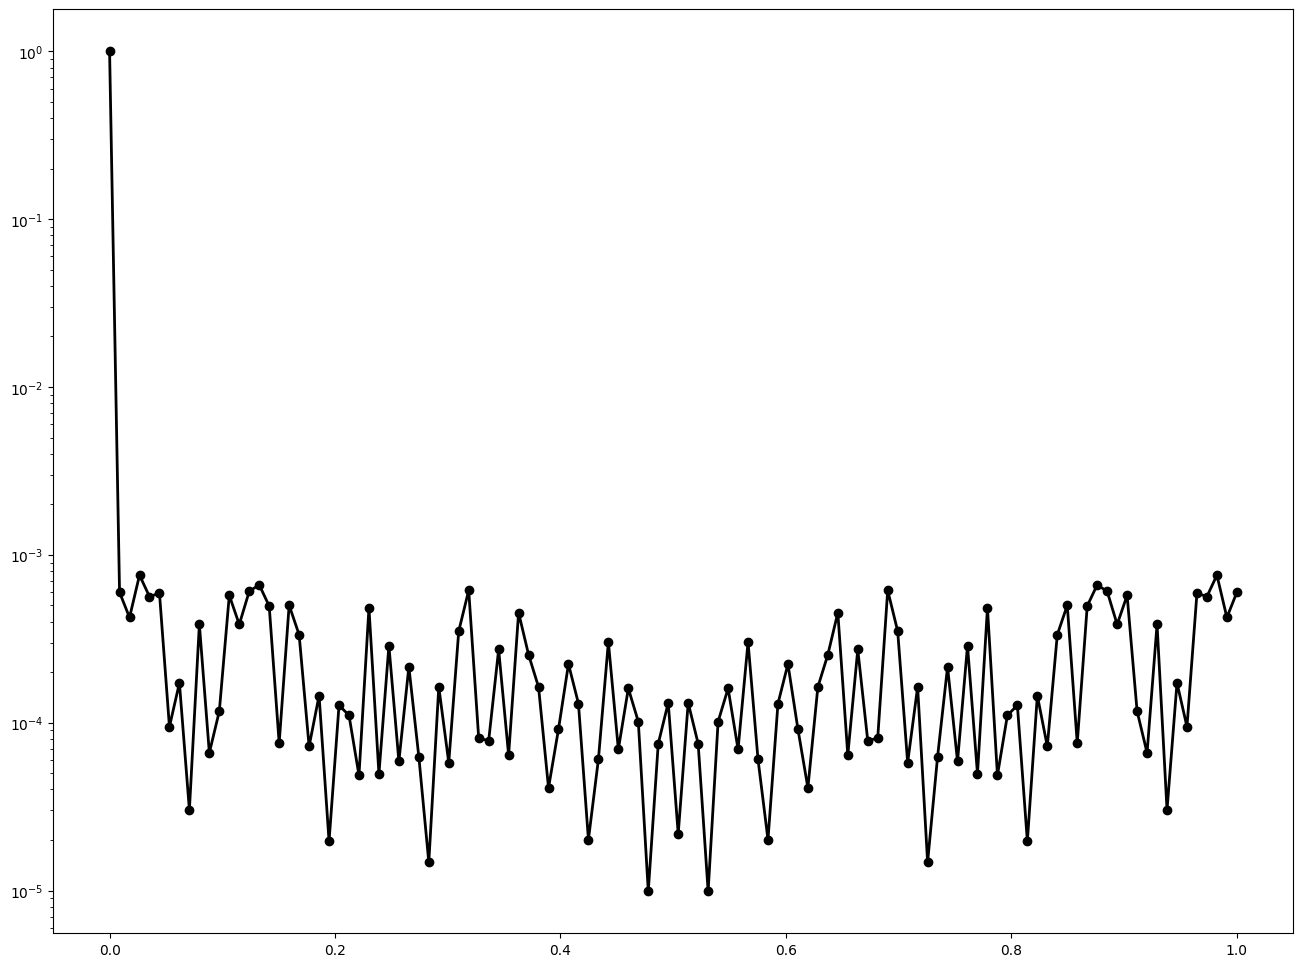

In [74]:
fftPlot(df_renamed['light'].values)

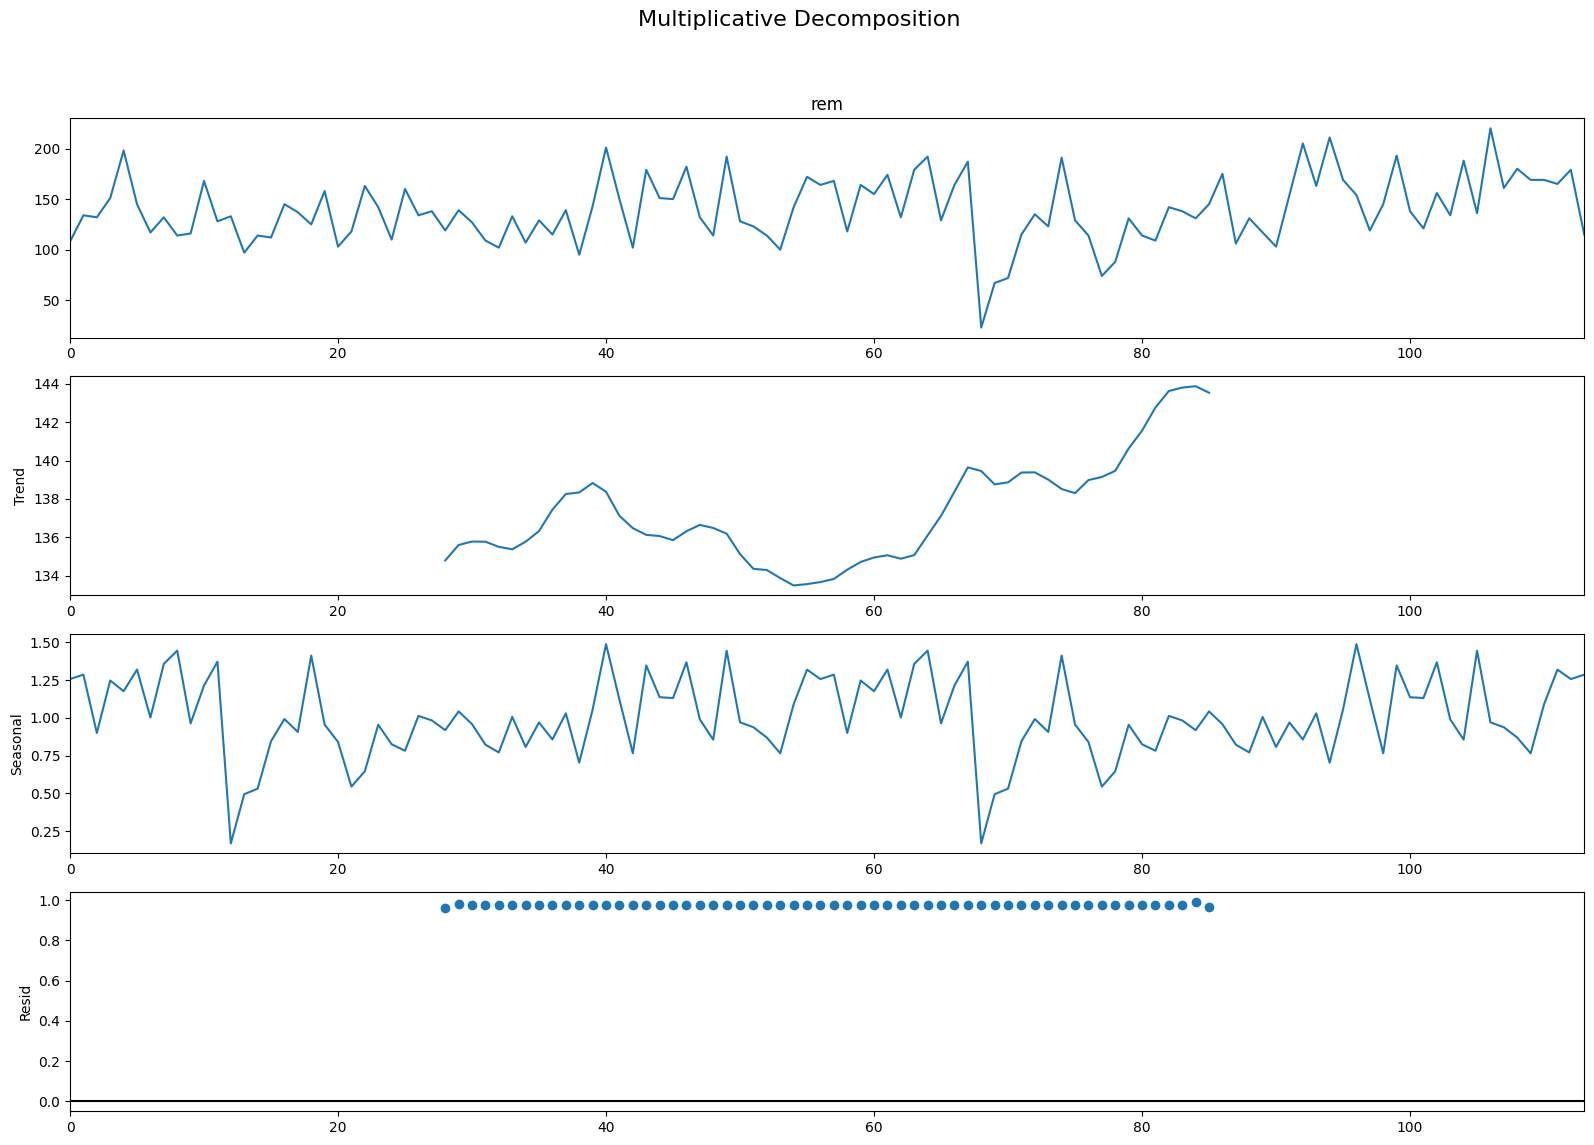

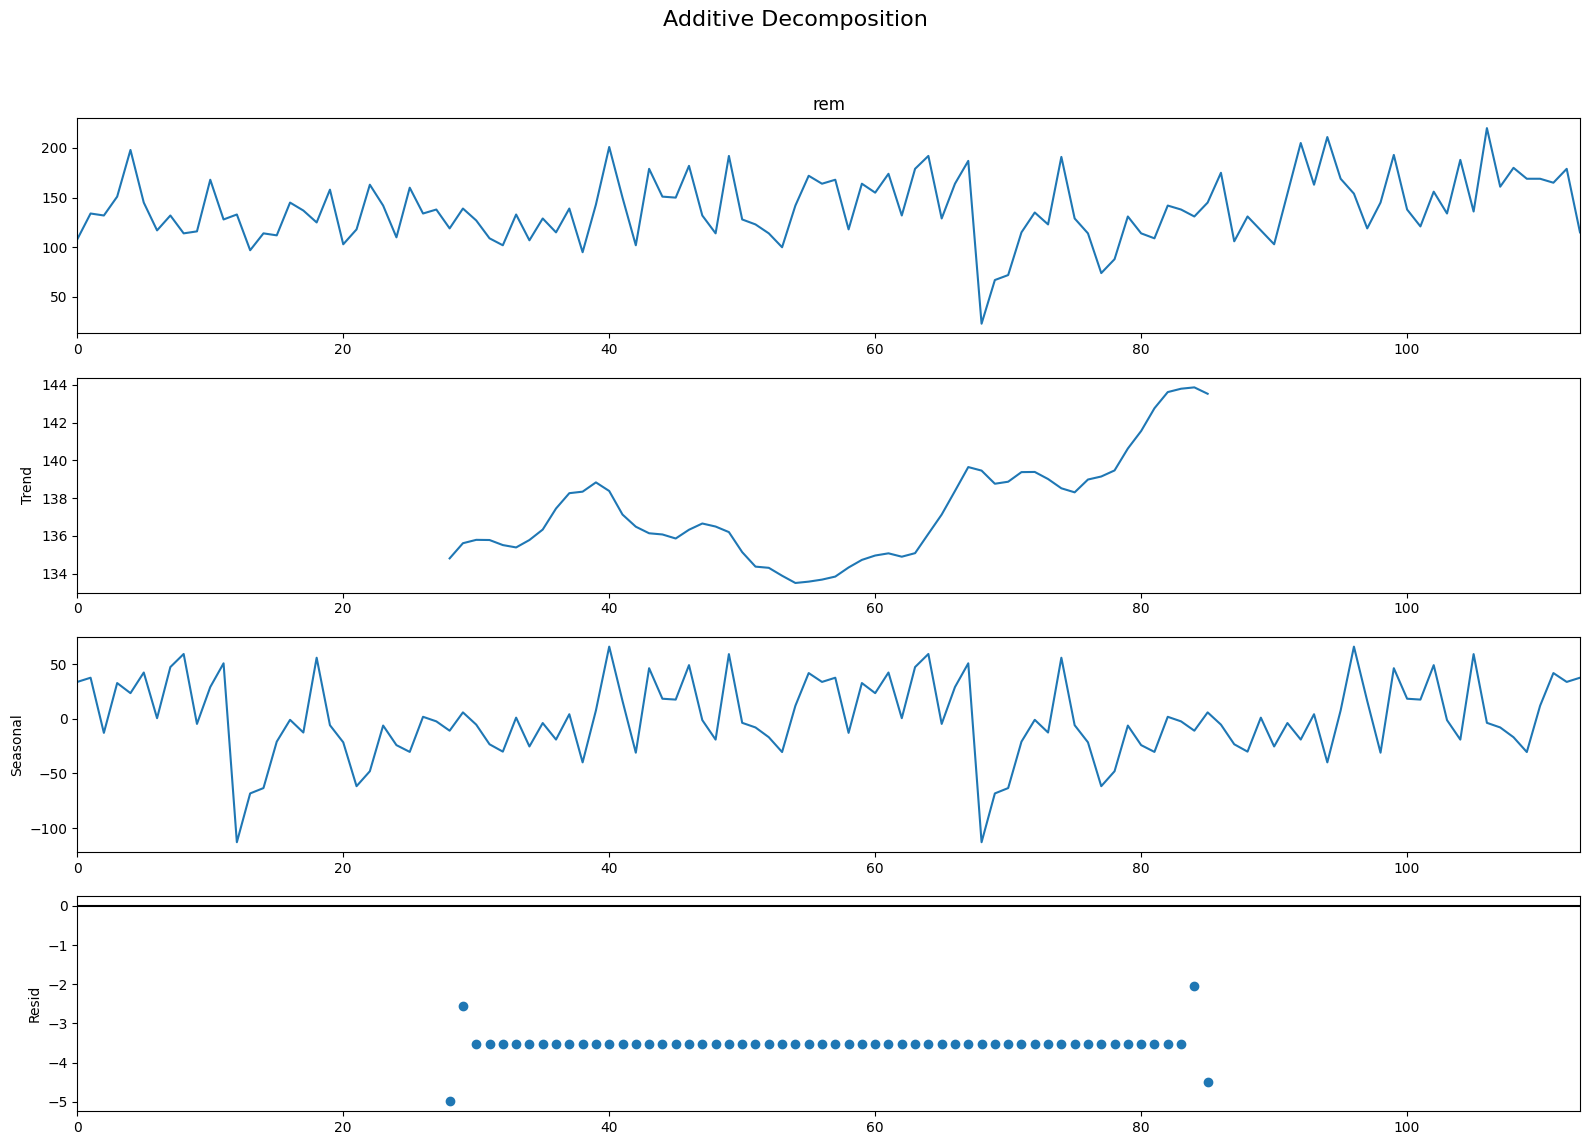

In [44]:
# add new date column only containing month and year
df['month_year'] = pd.to_datetime(df['Date']).dt.to_period('M')

# create dfs for 3 main lifts
squats =  df[df["exercise_name"] == "Squat (Barbell)"]
pullups = df[df["exercise_name"] == "Pull Up"]
dl = df[df["exercise_name"] == "Trap Bar Deadlift"]




                           Date    exercise_name set_order  Weight  Reps  \
month_year                                                                 
2019-06     2019-06-29 07:47:23  Squat (Barbell)         9   185.0  15.0   
2019-07     2019-07-30 11:36:30  Squat (Barbell)         9   195.0  20.0   
2019-08     2019-08-29 11:14:07  Squat (Barbell)         9   185.0  10.0   
2019-09     2019-09-28 10:14:56  Squat (Barbell)         9   185.0  11.0   
2019-10     2019-10-31 11:26:08  Squat (Barbell)         9   185.0  16.0   

            index  
month_year         
2019-06       0.0  
2019-07       1.0  
2019-08       2.0  
2019-09       3.0  
2019-10       4.0  


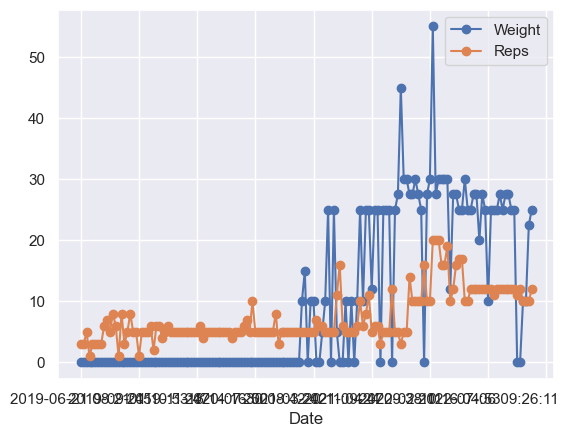

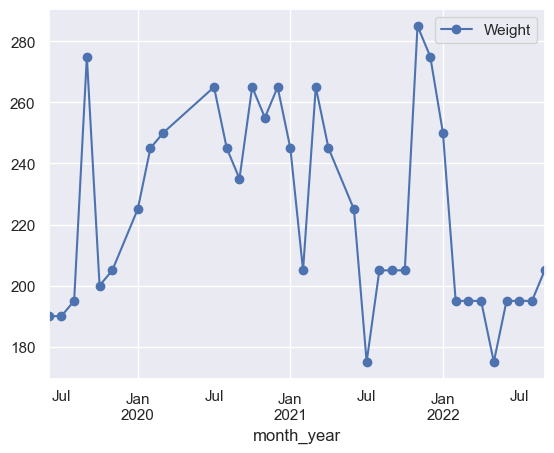

In [45]:
# Look at max reps and weight for pull ups
pullups.groupby("Date").agg(max).plot(y=['Weight','Reps'], marker = 'o')

# create the max for each lift per month
max_squats=squats.groupby("month_year").agg(max)
max_pullups = pullups.groupby("month_year").agg(max)
max_dl=dl.groupby("month_year").agg(max)

max_dl.plot.line(y='Weight', marker = 'o', linestyle = '-')
max_squats['index'] = np.linspace(0,37,38)
print(max_squats.head())



In [47]:
# Now let's look at max volume
squats = df[df["exercise_name"] == "Squat (Barbell)"]
squats['Volume'] = squats['Reps']*squats['Weight']
# print(squats['Volume'].head())






/var/folders/nk/cmv723pj6n38_mwnlhj_7z3m0000gp/T/ipykernel_42945/3417345641.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  squats['Volume'] = squats['Reps']*squats['Weight']


<AxesSubplot: xlabel='Date'>

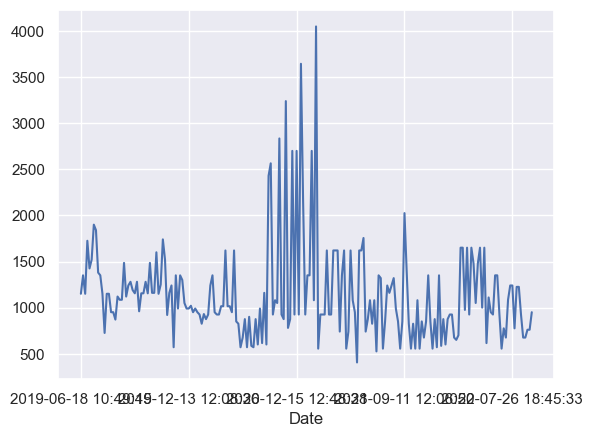

In [51]:
squats.groupby('Date')['Volume'].agg(max).plot()

# I haven't made any progress.. huh?


In [16]:
from d3blocks import D3Blocks
# Initialize
d3 = D3Blocks()

#currently the D3 package seems to have issues

# d3.timeseries(squats, datetime='Date', dt_format='%Y-%m', fontsize=10, figsize=[850, 500])






[d3blocks] >INFO> Cleaning edge_properties and config parameters..
[d3blocks] >INFO> Initializing [Timeseries]
[d3blocks] >INFO> Convert to Frame.
[d3blocks] >INFO> Node properties are set.
[d3blocks] >INFO> Edge properties are set.
[d3blocks] >INFO> File not found: [file:////var/folders/nk/cmv723pj6n38_mwnlhj_7z3m0000gp/T/d3blocks/timeseries.html]


/var/folders/nk/cmv723pj6n38_mwnlhj_7z3m0000gp/T/ipykernel_42945/712951197.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x = "index", y="Weight",


<AxesSubplot: xlabel='index', ylabel='Weight'>

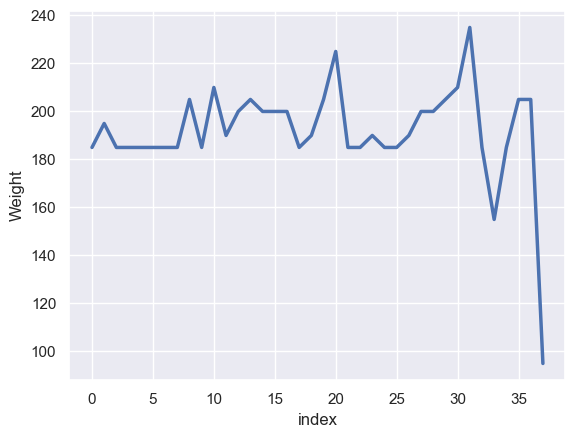

In [29]:
import seaborn as sns
sns.set_theme(style="darkgrid")
# Plot the responses for different events and regions
sns.lineplot(x = "index", y="Weight",
             data=max_squats,palette="tab10", linewidth=2.5)



In [52]:
max_squats.to_csv('squats_max.csv')



In [54]:
max_pullups.to_csv('pu_max.csv')




In [60]:
max_dl.to_csv('dl_max.csv')

